# Project 5 Example
### Alec K. Mattu (UTA)
### INST 414
### 12/01/2021

# Instructions
1. Use the columns  year,   L (which contains the number of words for each song), V (which contains the number of unique words for each song) and column D containing the ratio V/L  (no scaling  needed).

2. Make a k-means clustering model to find 2 groups in your songs based on all 4 features.

3. Create a scatter plot for 2 of the features (your choice). The points should be color-coded based on the clusters and the respective centroids should be added. Label the axes.

4. Use different subsets of features and find one selection that looks more meaningful to you and interpret the plot in less than 50 words in a markdown cell below the plot. What do you think is the similarity in the this clustering? Use statements such as: "Old songs are grouped together".

5. Now we want to investigate the effect of "number of clusters" on the "cost function". Change number of clusters between 1 and 19 and plot the cost function vs k. Label the axes. What is the best k in your opinion? Explain in less than 50 words in markdown cell below the plot.

6. Create a DBSCAN clustering model. Choose 3 different values for eps and repeat the clustering in a separate cell. How many clusters are detected by your model and how does it depend on your choice of eps? Explain in less than 100 words in markdown cell.

# Solution

## Part 0 - Preparation

In [30]:
# Import required libraries                               # HOMEWORK USAGE
import csv                                                # *Importing CSV
import pandas as pd                                       # General HW util
import numpy as np                                        # General util
import sklearn.metrics as metrics                         # LogisticRegression Metrics
import sklearn.feature_extraction                         # Song Lengths (L, V)
import matplotlib.pyplot as plt                           # General Graphing Util
from sklearn import linear_model                          # LogisticRegression
from sklearn.model_selection import train_test_split      # Splitting Training Data
from sklearn.metrics import classification_report         # LogisticRegression Classification
from mlxtend.plotting import plot_decision_regions        # Boundary Decision Graph
from sklearn import cluster                               # Clustering #2

In [13]:
# Hold songs in a list
songs = []

# Open CSV file with handle
with open("dataset_out.csv") as csv_file:
    # Create a file reader
    file_reader = csv.DictReader(csv_file)
    
    # Loop through CSV rows
    for row in file_reader:
        songs.append(row)

In [14]:
df = pd.DataFrame(songs)

In [21]:
# Drop the unnamed first column
df.drop(df.columns[0], axis = 1, inplace = True, errors = 'ignore')
df["Year"] = pd.to_numeric(df["Year"], errors = 'coerce')
df["L"] = pd.to_numeric(df["L"], errors = 'coerce')
df["V"] = pd.to_numeric(df["V"], errors = 'coerce')
df["D"] = pd.to_numeric(df["D"], errors = 'coerce')
df.dropna(axis = 0, inplace = True)

# Drop normalized columns
df.drop(["normalized_L", "normalized_V", "normalized_D"], axis = 1, inplace = True, errors = 'ignore')

# Drop Z-Score columns
df.drop(["z_score_L", "z_score_V", "z_score_D"], axis = 1, inplace = True, errors = 'ignore')

In [16]:
df

,Title,Artist,Year,Lyrics,L,V,D
0,the-battle,blood-sweat-tears,1970.0,While the king and queen lie sleeping\nAnd the...,103,70,0.6796116504854369
1,hey-jude,count-basie,1970.0,"Hey Jude, don't make it bad\nTake a sad song a...",98,41,0.41836734693877553
2,time,david-bowie,1973.0,"Time, he's waiting in the wings\nHe speaks of ...",197,74,0.3756345177664975
3,we-can-make-the-world-a-whole-lot-brighter,the-brady-bunch,1972.0,"Birds flying high,\nIn search of a clear blue ...",43,38,0.8837209302325582
4,day-by-day,carmen-mcrae,1972.0,Day by day I'm falling more in love with you\n...,29,19,0.6551724137931034
...,...,...,...,...,...,...,...
4495,the-dark-side-of-the-rainbow,da-grym-reefer,2012.0,Da Grym Reefer:\nI be sitting back\nThinking o...,270,185,0.6851851851851852
4496,tester,anthrax,2006.0,"I've changed, by staying the same\nWhat does i...",93,40,0.43010752688172044
4497,killing-me-inside,crossfade,2011.0,There's a dream that comes to me\nAnd it whisp...,82,34,0.4146341463414634
4498,babel,cruel-tie,2015.0,"I'm stepping down, hurrin' up. Settle down. Do...",109,82,0.7522935779816514


## Part 1 - Use Columns L, V, D
Nothing needs to be done here, existing columns

... Student specific code here

In [22]:
x = df[["Year", "L", "V", "D"]]

## Part 2 - K-Means Clustering
Produce two cluster groups.

In [24]:
model = cluster.KMeans(n_clusters = 2)
model.fit(x)
clusters_pred = model.predict(x)

## Part 3 - Scatter Plot of 2 Features
Select two features and produce a scatterplot of them, centroids should be visible, axes should be labeled.

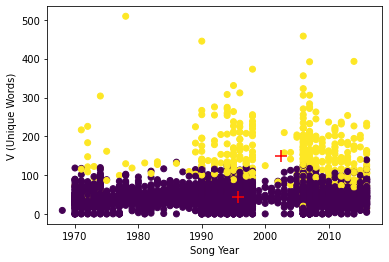

In [28]:
# Select the visible axes
axes = [0, 2]

# Define centroids
centroids = model.cluster_centers_

# Plot them
plt.scatter(x.values[:,axes[0]],x.values[:,axes[1]],c=clusters_pred)
plt.scatter(centroids[:,axes[0]],centroids[:,axes[1]],marker="+",c="red",s=150)

# Label Axes
plt.xlabel('Song Year')
plt.ylabel('V (Unique Words)')

# Show Plot
plt.show()

# Disable Output
None

## Part 4 - Different Subsets & Interpretation
Use different subsets of features and find one selection that looks more meaningful to you and interpret the plot in less than 50 words in a markdown cell below the plot. What do you think is the similarity in the this clustering? Use statements such as: "Old songs are grouped together".

... Repeat #3 multiple times and interpret the most meaningful plot

## Part 5 - Evaluate Clusters vs. Cost

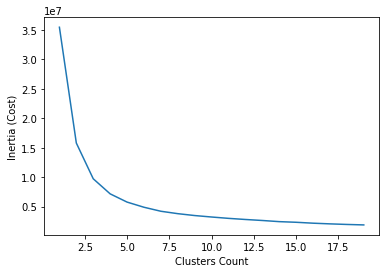

In [31]:
# List of inertias (cost)
inertias = []

# Run model on 19 different n_clusters
for k in np.arange(1, 20):
    model = cluster.KMeans(n_clusters = k)
    model.fit(x)
    inertias.append(model.inertia_)

# Plot Result
plt.plot(np.arange(1,20), inertias)
plt.xlabel("Clusters Count")
plt.ylabel("Inertia (Cost)")
plt.show()

# Hide Debug
None

... Student interpretation and thoughts on the above graph

## Part 6 - DBSCAN Models

In [37]:
# Run Model #1
model = cluster.DBSCAN(eps = 2, min_samples = 5)
model.fit(x) 

# Print Cluster Count
print(len(model.labels_))

4444


In [38]:
# Run Model #2
model = cluster.DBSCAN(eps = 3, min_samples = 9)
model.fit(x) 

# Print Cluster Count
print(len(model.labels_))

4444


In [39]:
# Run Model #3
model = cluster.DBSCAN(eps = 4, min_samples = 16)
model.fit(x) 

# Print Cluster Count
print(len(model.labels_))

4444


... Student interpretation of the above three figures